In [93]:
import numpy as np


In [94]:
my_arr = np.arange(1000000)


In [95]:
my_list = list(range(1000000))


In [96]:
%time for _ in range(10): my_arr2 = my_arr * 2


CPU times: user 20.2 ms, sys: 4.13 ms, total: 24.3 ms
Wall time: 23.2 ms


In [97]:
%time for _ in range(10): my_list2 = my_list * 2


CPU times: user 234 ms, sys: 7.98 ms, total: 242 ms
Wall time: 242 ms


# difference

Numpy-based algorithms are generally 10 to 100 times faster (or more) than their pure Python counterparts and use significantly less memory.

# 4.1 The Numpy ndarray: A multidimensional Array Object

In [98]:
import numpy as np

In [99]:
# Generate some random data
data = np.random.randn(2, 3)

In [100]:
data

array([[ 0.19959081,  0.2868437 , -0.89069595],
       [-1.82547745, -0.7574741 ,  0.6684694 ]])

In [101]:
data * 10

array([[  1.99590807,   2.86843701,  -8.9069595 ],
       [-18.25477448,  -7.57474102,   6.68469403]])

In [102]:
data + data

array([[ 0.39918161,  0.5736874 , -1.7813919 ],
       [-3.6509549 , -1.5149482 ,  1.33693881]])

**Every array has a shape, a tuple indicating the size of each dimension, and a dimension, and a dtype, an object describing the data type of the array:**

In [103]:
data.shape

(2, 3)

In [104]:
data.dtype

dtype('float64')

## Creating ndarrays

Using *array* function. This accepts any sequence-like object. For example, a list is a good candidate for conversion:

In [105]:
data1 = [6, 7.5, 1, 2, 22]

In [106]:
arr1 = np.array(data1)

In [107]:
arr1.dtype

dtype('float64')

In [108]:
arr1.shape

(5,)

In [109]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]

In [110]:
arr2 = np.array(data2)

In [111]:
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [112]:
arr2.min()

1

In [113]:
arr2.max()

8

In [114]:
arr2.ndim

2

In [115]:
arr1.dtype

dtype('float64')

In [116]:
arr2.dtype

dtype('int64')

*zeros* and *ones* create arrays of 0s or 1s. To create o higher dimensional array with these methods, pass a tuple for the shape:

In [117]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [118]:
np.zeros((3, 6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [119]:
np.empty((2, 3, 2))

array([[[9.92152559e+247, 8.41448157e+276],
        [5.56206120e+180, 1.49490204e+248],
        [9.54712568e-153, 7.16395186e-322]],

       [[6.90230074e-310, 6.90230074e-310],
        [2.64931062e+180, 7.54951879e-096],
        [8.41449847e+276, 1.39565693e-258]]])

## Data Types for ndarrays

The **dype** is a special object containing in the information (or, *metadata*, data about data) the ndarray needs to interpret a chunk of memory as a particular type of data:

In [120]:
arr1 = np.array([1, 2, 3], dtype=np.float64)

In [121]:
arr2 = np.array([1, 2, 3], dtype=np.int32)

In [122]:
arr1.dtype

dtype('float64')

In [123]:
arr2.dtype

dtype('int32')

You can explicitly convert or *cast* an array from one dtype to another using ndarray's astype method:

In [124]:
arr = np.array([1, 2, 3, 4, 5])

In [125]:
arr.dtype

dtype('int64')

In [126]:
float_arr = arr.astype(np.float64)

In [127]:
float_arr.dtype

dtype('float64')

In [128]:
float_arr

array([1., 2., 3., 4., 5.])

If you have an array of strings representing numbers, you can use astype to convert them to numeric form:

In [129]:
numeric_strings = np.array(["1.2", "-9.2", "42"], dtype=np.string_)

In [130]:
numeric_strings.astype(float)

array([ 1.2, -9.2, 42. ])

Calling the **astype** always creates a new array( a copy of the data), even if the new type is the same as the old type.

## Arithmetic with NumPy Arrays

Numpy has an important feature called vectorization. Any arithmetic operations between equal-size arrays applies the operation element-wise:

In [131]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])

In [132]:
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [133]:
arr * arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [134]:
arr - arr

array([[0., 0., 0.],
       [0., 0., 0.]])

In [135]:
1 / arr

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

In [136]:
arr ** 0.5

array([[1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974]])

In [137]:
arr2 = np.array([[0.0, 4, 2], [7.0, 2.0, 12.0]])

In [138]:
arr2

array([[ 0.,  4.,  2.],
       [ 7.,  2., 12.]])

In [139]:
arr2 > arr

array([[False,  True, False],
       [ True, False,  True]])

## Basic Indexing and Slicing

One-dimensional arrays are simple; on the surface they act similarly to Python lists:

In [140]:
arr = np.arange(10)

In [141]:
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [142]:
arr[5]

5

In [143]:
arr[5:8]

array([5, 6, 7])

In [144]:
arr[5:8] = 12

In [145]:
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

This means that the data is not copied, and any modifications to the view will be reflected in the source array.

In [146]:
arr_slice = arr[5:8]

In [147]:
arr_slice

array([12, 12, 12])

Now, when I change values in arr_slice, the mutations are reflected in the original array arr:

In [148]:
arr_slice[1] = 12345

In [149]:
arr_slice

array([   12, 12345,    12])

In [150]:
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

The "bare" slice[:] will assign to all values in an array:

In [151]:
arr_slice[:] = 64

In [152]:
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

With higher dimensional arrays:

In [153]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

In [154]:
arr2d[2]

array([7, 8, 9])

you can pass a comma-separated list of indices to select individual elements.

In [155]:
arr2d[0][2]

3

equals to: 

In [156]:
arr2d[0, 2]

3

If you want a copy of a slice of an ndarray instead of a view, you will need to explictly copy the array-for example, arr[5:8].copy()

In [157]:
arr = np.array(range(10))

In [158]:
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [159]:
arr2 = arr[5:8]

In [160]:
arr2 is arr[5:8]

False

In [161]:
arr2 == arr[5:8]

array([ True,  True,  True])

In multidimensional arrays, If you omit later indices, the retured object will be a low dimensional ndarray consisting of all the data along the higher dimensions. 

In [162]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])

In [163]:
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

arr3d[0] is a 2 * 3 array:

In [164]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

### Indexing with slices

In [165]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

Consider the two-dimensional array, it has sliced along axis 0, the first axis. It can be helpful to read the expression arr2d[:2] as **"select the first two rows of arr2d."**

In [166]:
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

You can pass multiple slices just like you can pass multiple indexes:

In [167]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

By mixing integer indexes and slices, you get lower dimensional slices.

In [168]:
arr2d[1, :2]

array([4, 5])

In [169]:
arr2d[:2, 2]

array([3, 6])

Note that a colon by itself means to take the entire axis, so you can slice only higher dimensional axes by doing:

In [170]:
arr2d[:, :1]

array([[1],
       [4],
       [7]])

## Boolean Indexing
Let's consider an example where we have some data in an array and an array of names with duplicates

In [171]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])

In [172]:
data = np.random.randn(7, 4)

In [173]:
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [174]:
data

array([[-2.226444  ,  1.96855426,  0.49280174, -0.83545336],
       [-0.42317866, -1.24617516,  0.93968363,  1.60638004],
       [-0.24962508, -1.06219201, -0.96054962,  0.74294901],
       [-0.92436441, -1.46704524, -0.6187913 , -0.14918324],
       [ 1.38659535,  1.33102263, -0.40952107, -0.65864468],
       [ 1.45622409,  1.22003311,  0.06114012,  0.9209303 ],
       [ 0.30262474, -0.43010962,  0.41237063,  0.03716936]])

Suppose each name corresponds to a row in the data array and we wanted to select all the rows with corresponding name 'Bob'.

In [175]:
names == 'Bob'

array([ True, False, False,  True, False, False, False])

In [176]:
data[names == 'Bob']

array([[-2.226444  ,  1.96855426,  0.49280174, -0.83545336],
       [-0.92436441, -1.46704524, -0.6187913 , -0.14918324]])

Boolean selection will not fall if the boolean array is not the correct length,  so be careful when using this feature.

In [177]:
data[names == "Bob", 2:]

array([[ 0.49280174, -0.83545336],
       [-0.6187913 , -0.14918324]])

In [178]:
data[names == 'Bob', 3]

array([-0.83545336, -0.14918324])

In [179]:
names != 'Bob'

array([False,  True,  True, False,  True,  True,  True])

In [180]:
~(names == 'Bob')

array([False,  True,  True, False,  True,  True,  True])

In [181]:
data[~(names == 'Bob')]

array([[-0.42317866, -1.24617516,  0.93968363,  1.60638004],
       [-0.24962508, -1.06219201, -0.96054962,  0.74294901],
       [ 1.38659535,  1.33102263, -0.40952107, -0.65864468],
       [ 1.45622409,  1.22003311,  0.06114012,  0.9209303 ],
       [ 0.30262474, -0.43010962,  0.41237063,  0.03716936]])

The ~ operator can be useful when you want to invert a general condition:

In [182]:
cond = names == 'Bob'

In [183]:
data[~cond]

array([[-0.42317866, -1.24617516,  0.93968363,  1.60638004],
       [-0.24962508, -1.06219201, -0.96054962,  0.74294901],
       [ 1.38659535,  1.33102263, -0.40952107, -0.65864468],
       [ 1.45622409,  1.22003311,  0.06114012,  0.9209303 ],
       [ 0.30262474, -0.43010962,  0.41237063,  0.03716936]])

Selecting two of the three names to combine multiple boolean conditions, use boolean arithmetic operator like & and |:

In [188]:
mask = (names == "Bob") | (names == "Will")

In [189]:
mask

array([ True, False,  True,  True,  True, False, False])

In [190]:
data[mask]

array([[-2.226444  ,  1.96855426,  0.49280174, -0.83545336],
       [-0.24962508, -1.06219201, -0.96054962,  0.74294901],
       [-0.92436441, -1.46704524, -0.6187913 , -0.14918324],
       [ 1.38659535,  1.33102263, -0.40952107, -0.65864468]])

Selecting data from an array by boolean indexing **always** creates a copy of the data, even if the returned array is unchanged.

In [191]:
data < 0

array([[ True, False, False,  True],
       [ True,  True, False, False],
       [ True,  True,  True, False],
       [ True,  True,  True,  True],
       [False, False,  True,  True],
       [False, False, False, False],
       [False,  True, False, False]])

Setting values with boolean arrays works in a common-sense way. To set all of the negative values in data to 0 we need only do:

In [192]:
data[data < 0] = 0

In [193]:
data

array([[0.        , 1.96855426, 0.49280174, 0.        ],
       [0.        , 0.        , 0.93968363, 1.60638004],
       [0.        , 0.        , 0.        , 0.74294901],
       [0.        , 0.        , 0.        , 0.        ],
       [1.38659535, 1.33102263, 0.        , 0.        ],
       [1.45622409, 1.22003311, 0.06114012, 0.9209303 ],
       [0.30262474, 0.        , 0.41237063, 0.03716936]])

## Fancy Indexing

*Fancy Indexing* is a term to describe indexing using integer arrays.

In [194]:
arr = np.empty((8, 4))

In [195]:
for i in range(8):
    arr[i] = i

In [196]:
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

To select out a subset of the rows in a particular order, you can simply pass a list or ndarray of integers specifying the desired order:

In [197]:
arr[[4, 5, 2, 7]]

array([[4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [2., 2., 2., 2.],
       [7., 7., 7., 7.]])

In [198]:
arr[[-3, -5, 7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [7., 7., 7., 7.]])

Passing multiple index arrays does something slightly different; it selects a one-dimensional array of elements corresponding to each tuple of indices.

In [199]:
arr = np.arange(32).reshape((8, 4))

In [200]:
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [201]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]]

array([ 4, 23, 29, 10])

Here the elements (1, 0), (5, 3), (7, 1) and (2, 2) were selected.

Keep in mind that fancy indexing, unlike slicing, always copies the data into a new array.

## Transposing Arrays and Swapping Axes 

Transposing is a special form of reshaping that similarly returns a view on the underlying data without copying anything. Arrays have the *transpose* method and also the special **T** attribute:

In [6]:
arr = np.arange(15).reshape((3, 5))

In [7]:
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [206]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

computing the inner matrix product using **np.dot**:

In [207]:
arr = np.random.randn(6, 3)

In [208]:
arr

array([[ 0.25814793, -1.12290867,  0.8149298 ],
       [-0.51159016, -1.1589176 , -1.41108318],
       [ 1.34739419,  1.20714464,  0.54471595],
       [-0.44307835,  0.25412696, -1.17810398],
       [ 1.81769898, -0.45749852, -0.56853505],
       [ 0.35675214,  0.90737588,  0.99263959]])

In [209]:
np.dot(arr.T, arr)

array([[5.77145607, 1.30902951, 1.50890891],
       [1.30902951, 5.15842847, 2.23920151],
       [1.50890891, 2.23920151, 5.64847623]])

For higher dimensional arrays, **transpose** will accept a tuple of axis numbers to permute the axes (for extra mind bending):

In [8]:
arr = np.arange(16).reshape((2, 2, 4))

In [9]:
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [10]:
arr.transpose((1, 0, 2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

Here, the axes have been reordered with the second axis first, the first axis second, and the last axis unchanged.

# 4.2 Universal Functions: Fast Element-Wise Array Functions

A universal function, or *ufunc*, is a function that performs element-wise operations on data in ndarrays.

In [11]:
arr = np.arange(10)

In [12]:
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [13]:
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [14]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

In [20]:
x = np.random.randn(8)
y = np.random.randn(8)

In [21]:
x

array([ 0.24473901,  0.68435564, -0.53563649, -0.54033497, -0.18503608,
        0.14600453,  0.26365472, -0.70262872])

In [22]:
y

array([-0.58663737, -0.91846929,  0.67195172, -0.97437895,  1.49357464,
        0.69568452, -2.02116608, -1.5078789 ])

In [23]:
np.maximum(x, y)

array([ 0.24473901,  0.68435564,  0.67195172, -0.54033497,  1.49357464,
        0.69568452,  0.26365472, -0.70262872])

In [30]:
arr = np.random.randn(7) * 5

In [31]:
arr

array([ 0.74418984,  7.28727211,  1.19280401, -2.04513503,  4.52808556,
       -0.7314397 ,  0.80517858])

In [32]:
remainder, whole_part = np.modf(arr)

In [33]:
remainder

array([ 0.74418984,  0.28727211,  0.19280401, -0.04513503,  0.52808556,
       -0.7314397 ,  0.80517858])

In [34]:
whole_part

array([ 0.,  7.,  1., -2.,  4., -0.,  0.])

Ufuncs accept an optional out argument that allows them to operate in-place on arrays:

In [35]:
arr

array([ 0.74418984,  7.28727211,  1.19280401, -2.04513503,  4.52808556,
       -0.7314397 ,  0.80517858])

In [36]:
np.sqrt(arr)

/home/jay/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([0.86266439, 2.69949479, 1.09215567,        nan, 2.12792988,
              nan, 0.89731743])

In [37]:
arr

array([ 0.74418984,  7.28727211,  1.19280401, -2.04513503,  4.52808556,
       -0.7314397 ,  0.80517858])

In [39]:
np.sqrt(arr, arr)

/home/jay/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


array([0.86266439, 2.69949479, 1.09215567,        nan, 2.12792988,
              nan, 0.89731743])

In [40]:
arr

array([0.86266439, 2.69949479, 1.09215567,        nan, 2.12792988,
              nan, 0.89731743])

# 4.3 Array-Oriented Programming with Arrays 

As a simple example, suppose we wished to evaluate the function *sqrt*(x^2 + y^2) across a regular grid of values. The **np.meshgrid** function takes two 1D arrays and produces two 2D matrices corresponding to all pairs of (x, y) in the two arrays:

In [1]:
points = np.arange(-5, 5, 0.01) # 1000 equally spaced points

In [6]:
xs, ys = np.meshgrid(points, points)

In [7]:
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [8]:
xs

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ...,
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

In [9]:
z = np.sqrt(xs ** 2 + ys ** 2)

In [10]:
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

In [11]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

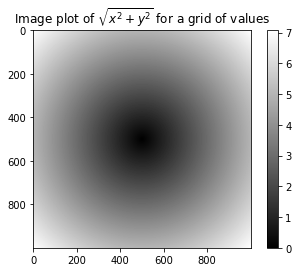

In [14]:
plt.imshow(z, cmap=plt.cm.gray)
plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

## Expressing Conditional Logic as Array Operations

The **numpy.where** function is vectorized version of the ternary expression *x if condition else y*. Suppose we had a boolean array and two arrays of values:

In [15]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])

In [16]:
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])

In [18]:
cond = np.array([True, False, True, True, False])

In [19]:
result = [(x if c else y) for x, y, c in zip(xarr, yarr, cond)]

In [20]:
result

[1.1, 2.2, 1.3, 1.4, 2.5]

With **np.where** you can write this very concisely:

In [24]:
result = np.where(cond, xarr, yarr)

In [25]:
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

The second and third arguments to **np.where** don't need to be arrays.

In [26]:
arr = np.random.randn(4, 4)

In [27]:
arr

array([[-0.08896921, -0.86949567, -0.07070624,  0.45763837],
       [-2.51920306,  0.37194559,  1.00559998,  0.93836216],
       [-0.97511711,  0.59288675,  0.36860423, -1.57285951],
       [-1.08352952,  0.41514986, -0.82179015,  0.16433473]])

In [28]:
arr > 0

array([[False, False, False,  True],
       [False,  True,  True,  True],
       [False,  True,  True, False],
       [False,  True, False,  True]])

Replace all positive values with 2 and all negative values with -2.

In [29]:
np.where(arr > 0, 2, -2) 

array([[-2, -2, -2,  2],
       [-2,  2,  2,  2],
       [-2,  2,  2, -2],
       [-2,  2, -2,  2]])

Replace all positive values in **arr** with the constant 2 like so:

In [30]:
np.where(arr > 0, 2, arr)

array([[-0.08896921, -0.86949567, -0.07070624,  2.        ],
       [-2.51920306,  2.        ,  2.        ,  2.        ],
       [-0.97511711,  2.        ,  2.        , -1.57285951],
       [-1.08352952,  2.        , -0.82179015,  2.        ]])

## Mathematical and Statistical Methods

In [35]:
arr_reminder, arr_whole  = np.modf(np.random.rand(5, 4)*10)

In [36]:
arr_whole

array([[9., 2., 7., 3.],
       [7., 2., 5., 8.],
       [8., 7., 5., 2.],
       [6., 6., 5., 7.],
       [4., 9., 0., 3.]])

In [43]:
arr_whole.mean()

5.25

In [44]:
np.mean(arr_whole)

5.25

In [45]:
arr_whole.sum()

105.0

In [46]:
np.sum(arr_whole)

105.0

In [47]:
arr_whole.mean(axis=1)

array([5.25, 5.5 , 5.5 , 6.  , 4.  ])

In [48]:
arr_whole.sum(axis=0)

array([34., 26., 22., 23.])

Here, **arr_whole.mean(1)** means "compute mean across the columns" where **arr_whole.sum(0)** means "compute sum down the rows."

## Methods for Boolean Arrays

Boolean values are coerced to 1 (True) and 0 (False) in

In [55]:
arr  = np.random.randn(10)

In [56]:
arr

array([ 0.50312056,  0.90154594,  0.95991547, -1.06629821, -1.40579383,
        0.49469753,  1.50206528, -0.15802029, -1.33154559,  0.27830286])

In [59]:
(arr > 0).sum()

6

In [60]:
bools = np.array([False, False, True, False])

In [61]:
bools.any()

True

In [62]:
bools.all()

False

## Sorting

Like Python's built-in list type, Numpy arrays can be sorted **in-place** with the sort method:

In [63]:
arr = np.random.randn(6)

In [64]:
arr

array([ 0.57293863,  0.28459192, -0.69950231, -1.2350322 , -0.98688138,
        1.19934102])

In [69]:
arr.sort()

In [66]:
arr

array([-1.2350322 , -0.98688138, -0.69950231,  0.28459192,  0.57293863,
        1.19934102])

# 4.4 File Input and Output with Arrays

**np.save** and **np.load** are the two workhorse functions for efficiently saving and loading array data on disk. Arrays are saved by default in an uncompressed raw binary format with file extension **.npy**

In [1]:
arr = np.arange(10)

In [2]:
np.save("some_array", arr)

In [3]:
np.load("some_array.npy")

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

You save multiple arrays in an uncompressed archive using **np.savez** and passing the arrays as keyword arguments:

In [6]:
np.savez("./python_data_analysis/array_archive.npz", a =arr, b = arr)

In [9]:
arch = np.load("./python_data_analysis/array_archive.npz")

In [13]:
arch.files

['a', 'b']

In [12]:
arch['a']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

If your data compresses well, you my wish to use **numpy.savez_compressed** instead:

In [15]:
np.savez_compressed("./python_data_analysis/arrays_compressed.npz", a=arr, b=arr)

# 4.5 Linear Algebra

There is a function **dot**, both an array method and a function in the **numpy** namespace, for matrix multiplication:

In [16]:
x = np.array([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])

In [17]:
y = np.array([[6.0, 23.0], [-1, 7], [8, 9]])

In [18]:
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [19]:
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

In [20]:
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

**x.dot(y)** is equivalent to **np.dot(x, y)**:

In [21]:
np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

A matrix product between a two-dimensional array and a suitably sized one-dimensional array results in a one-dimensional array:

In [31]:
np.dot(x, np.ones(3))

array([ 6., 15.])

The @ symbol also work as an infix operator that performs matrix multiplication:

In [32]:
x @ np.ones(3)

array([ 6., 15.])

**numpy.linalg** has a standard set of matrix decompositions and things like inverse and determinant.

In [40]:
from numpy.linalg import inv, qr

X = np.random.randn(5, 5)

mat = X.T.dot(X)

In [41]:
inv(mat)

array([[ 2.51820383,  0.1613996 , -0.50597019, -0.48562325,  0.91777309],
       [ 0.1613996 ,  2.01873312,  0.26791986,  0.74847054, -0.22069131],
       [-0.50597019,  0.26791986,  0.60871555,  0.19045202, -0.34471008],
       [-0.48562325,  0.74847054,  0.19045202,  0.55797223, -0.2833583 ],
       [ 0.91777309, -0.22069131, -0.34471008, -0.2833583 ,  0.55923509]])

In [38]:
mat.dot(inv(mat))

array([[ 1.00000000e+00,  1.42108547e-14, -3.55271368e-15,
         0.00000000e+00,  0.00000000e+00],
       [-7.10542736e-15,  1.00000000e+00,  7.10542736e-15,
        -1.42108547e-14,  0.00000000e+00],
       [ 2.84217094e-14,  5.68434189e-14,  1.00000000e+00,
         1.42108547e-14,  0.00000000e+00],
       [ 2.66453526e-15,  8.52651283e-14, -1.68753900e-14,
         1.00000000e+00, -3.19744231e-14],
       [ 0.00000000e+00, -5.68434189e-14,  7.10542736e-15,
        -1.42108547e-14,  1.00000000e+00]])

In [39]:
q, r = qr(mat)

In [43]:
r

array([[-6.45701467e+00,  5.82865246e+00,  7.39404123e-02,
        -6.38221235e+00, -9.45750204e-01],
       [ 0.00000000e+00, -5.46379253e+00,  6.27106012e+00,
         6.03216310e+00, -2.70742105e+00],
       [ 0.00000000e+00,  0.00000000e+00, -4.63805335e+00,
        -3.62832751e-01,  8.27711904e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -2.89246088e+00, -1.30164206e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  5.92399271e-03]])

In [44]:
q

array([[-0.79892931, -0.34877385, -0.32818654,  0.24650493, -0.26757742],
       [ 0.42605654, -0.53295977, -0.32127928, -0.38128422, -0.53463228],
       [ 0.11214289,  0.45284506, -0.87102495,  0.01110113,  0.15345238],
       [-0.37186638,  0.46619327,  0.12854267, -0.72400195, -0.32198943],
       [-0.17125174, -0.41461532, -0.11775204, -0.51918745,  0.71787592]])

In linear algebra, a QR decomposition, also known as a QR factorization, is a decomposition of a matrix A into a product A = QR of an orthogonal matrix Q and an upper triangular matrix R. QR decomposition is often used to solve the linear least squares problem and is the basis for a particular eigenvalue algorithm, the QR algorithm.

# 4.6 Pseudorandom Number Generation

The **numpy.random** module supplements the built-in Python **random** with functions for efficiently generating whole arrays of sample values from many kinds of probability distributions. For example, you can get a 4 * 4 array of samples from the standard normal distribution using normal:

In [3]:
samples = np.random.normal(size=(4, 4))

In [4]:
samples

array([[-0.54042672, -0.98181922, -0.9673733 , -0.86282039],
       [-1.18239489,  0.79548607, -0.11744752,  0.74199025],
       [ 0.34665634, -0.6411293 ,  0.14593501, -0.12713952],
       [-0.29764188,  0.58915405, -1.28462498, -0.43054924]])

Python's built-in **random** module, by contrast, only samples one value at a time. As you can see from this benchmark, **numpy.random** is well over an order of magnitude faster for generating very large samples:

In [5]:
from random import normalvariate

In [6]:
N = 1000000

In [7]:
%timeit samples = [normalvariate(0, 1) for _ in range(N)]

924 ms ± 27.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
%timeit np.random.normal(size=N)

46.9 ms ± 430 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


# 4.7 Example: Random Walks

In [9]:
import random

position = 0 
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)

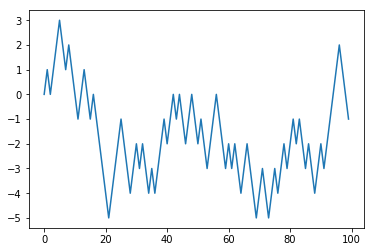

In [17]:
import matplotlib.pyplot as plt

plt.plot(walk[:100])